# Wavelet transformation with omega-rescaled time variable

The original wavelet transformation reads as
$$ W(t,\omega) = \frac{r\omega}{\sqrt{2\pi}} \int\limits_{-\infty}^\infty\! d\tau\, e^{-\frac12 (r\omega\tau)^2+i\omega\tau} f(t+\tau). $$

One possible approach to perform this integral is to rescale the integration variable $s =\omega\tau$
$$ W(t,\omega) = \frac{r}{\sqrt{2\pi}} \int\limits_{-\infty}^\infty\! ds\, e^{-\frac12 (rs)^2+is} f(t+\frac s\omega). $$
The prefactor is constant, so we will omit it. Also the improprious integral can then be replaced with a finite value, since for $s>Q/r$ where, say, Q=3 or 4, is already very small. So
$$ W(t,\omega) = \int\limits_{-Q/r}^{Q/r}\! ds\, e^{-\frac12 (rs)^2+is} f(t+\frac s\omega). $$
This integral can be discretized
$$ W(t,\omega) = \sum\limits_{n=-N_s}^{N_s} ds\, e^{-\frac12 (rs_n)^2+is_n} f(t+\frac{s_n}\omega). $$
where $ds$ is a given quantity, say $ds=0.1$, $N_s = {Q}/(ds\, r)$ and $s_n= n\,ds$.

$f$ is also given by a vector, $f_i = f(i\,dt_0)$, where $dt_0$ is the inverse of the sampling rate $\nu_0$. Thus the time can be replaced by an index
$$ W(i,\omega) = \sum\limits_{n=-N_s}^{N_s} ds\, e^{-\frac12 (rs_n)^2+is_n} f_{i+ di_n},\qquad di_n =\frac{\nu_0 s_n}omega. $$

This formula is coded below.

It works nicely, but the online embedding of the function takes too much time. We shall remain with the fixed time intervall integration.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import find_peaks
import time
import sounddevice as sd
import noisereduce as nr

from spectrogram import *

In [2]:
spectrum_factory = SpectrumGenerator(linewidth=2)

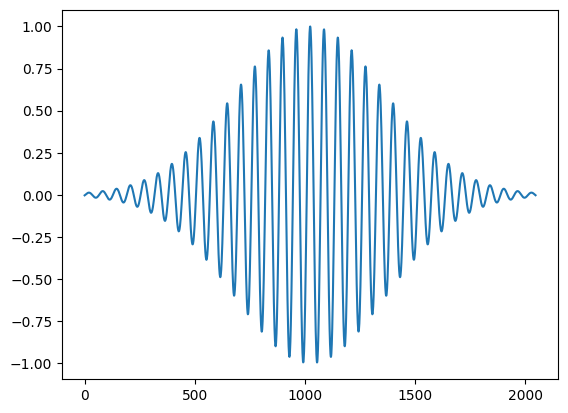

In [3]:
Q=3 # in units of the wavelet width
N_octave = 24 # division points per octave
rfactor = 2**(1/N_octave)-1
ds = 0.1
sample_rate = 44100 #Hz

N_int = int(2*Q/(rfactor*ds))
numin = 10 #Hz
N_length = N_int*ds*sample_rate/(2*np.pi*numin)
t_delay = Q/(rfactor*numin) # delay in seconds
def sampler(f, n, nu ):
    return np.array([ f[ n + int( i*ds*sample_rate/(2*np.pi*nu)) ] for i in np.arange(-Q/(rfactor*ds), Q/(rfactor*ds))])

s_mask = np.array([ np.exp(-(rfactor*sn)**2/2 + 1j*sn) for sn in np.arange(-Q/rfactor, Q/rfactor, ds) ])
plt.plot(s_mask.real)
plt.show()

In [4]:
N_length, N_int, t_delay

(143673.4643125174, 2047, 10.238126312676167)

In [5]:
trange = np.arange(0,30,1/sample_rate)
O = 420 #Hz
f = np.cos(2*np.pi*O*trange)

In [6]:
t = 15 #sec
for nn in range(10):
    res = []
    for nu in spectrum_factory.frequencies:
        f_sample = sampler(f, int(t*sample_rate), nu)
        res.append([nu, f_sample@s_mask])
    res = np.array(res)

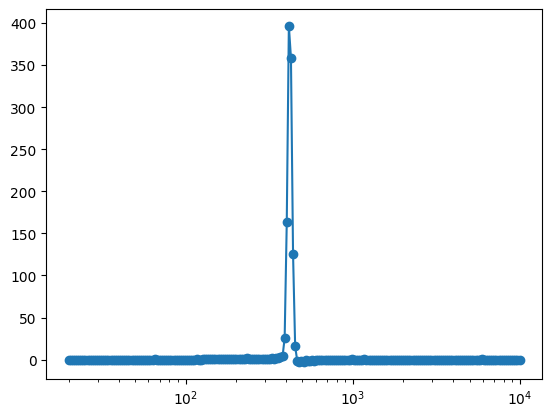

In [7]:
plt.plot(res[:,0].real, res[:,1].real, 'o-')
plt.xscale('log')

In [10]:
maxes = []
NN = len(spectrum_factory.frequencies)
for n,O in enumerate(spectrum_factory.frequencies):
    f = np.cos(2*np.pi*O*trange)
    res = []
    for nu in spectrum_factory.frequencies:
        f_sample = sampler(f, int(t*sample_rate), nu)
        res.append([nu, f_sample@s_mask])
    res = np.array(res)
    maxes.append(np.max(np.abs(res[:,1].real)))
    print(f"{100*n/NN:4.2f} % done", end='\r')
maxes = np.array(maxes)

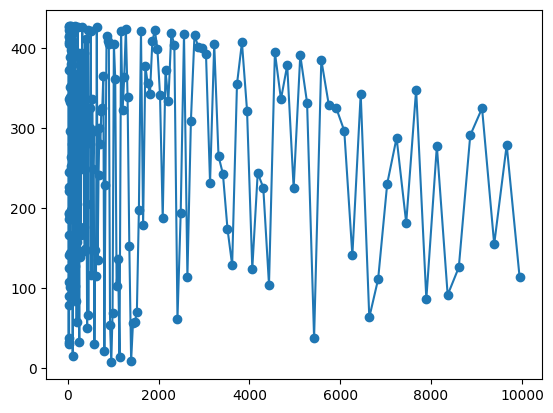

In [11]:
plt.plot(spectrum_factory.frequencies, maxes, 'o-')